<a href="https://colab.research.google.com/github/patdring/StockTrendForecaster/blob/main/StockPriceProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptx8ty9xq/1eoxgxvm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptx8ty9xq/arn9i8wk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95531', 'data', 'file=/tmp/tmptx8ty9xq/1eoxgxvm.json', 'init=/tmp/tmptx8ty9xq/arn9i8wk.json', 'output', 'file=/tmp/tmptx8ty9xq/prophet_model4021ghj_/prophet_model-20240106160433.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:04:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:04:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


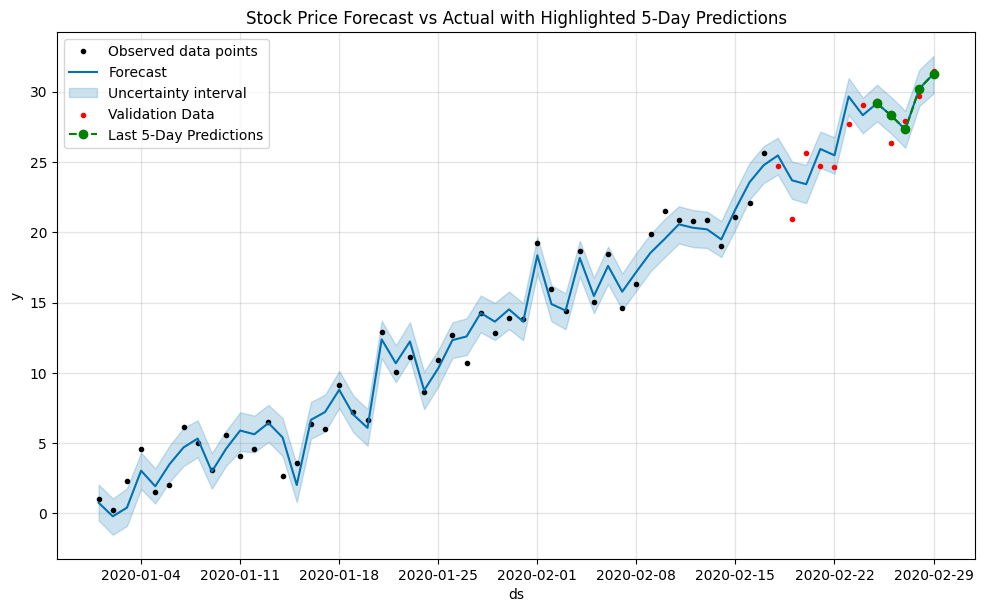

In [16]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Generate simulated data
np.random.seed(42)
num_data_points = 60
dates = pd.date_range(start='2020-01-01', periods=num_data_points, freq='D')
stock_prices = np.random.randn(num_data_points) * 2 + np.arange(num_data_points) * 0.5
economic_data = stock_prices * 0.3 + np.random.randn(num_data_points) * 0.5
temperature_data = stock_prices * 0.1 + 20 + np.random.randn(num_data_points) * 5
sentiment_data = stock_prices * 0.05 + np.random.uniform(-1, 1, num_data_points)

# Prepare the data for Prophet
df = pd.DataFrame({
    'ds': dates,
    'y': stock_prices,
    'economic': economic_data,
    'temperature': temperature_data,
    'sentiment': sentiment_data
})

# Split data into training and validation sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:]

# Initialize the Prophet model with additional regressors
model = Prophet()
model.add_regressor('economic')
model.add_regressor('temperature')
model.add_regressor('sentiment')
model.fit(train_data)

# Create a DataFrame for future predictions including validation period
future = model.make_future_dataframe(periods=len(val_data))
# Include the regressors in the future DataFrame
future = future.merge(df[['ds', 'economic', 'temperature', 'sentiment']], on='ds', how='left')

# Make predictions
forecast = model.predict(future)

# Plot the forecast along with actual data
fig = model.plot(forecast)
plt.scatter(val_data['ds'], val_data['y'], color='r', marker='.', label='Validation Data')

# Highlight the last 5 predicted values
last_5_days = forecast['ds'].tail(5)
last_5_predictions = forecast['yhat'].tail(5)
plt.plot(last_5_days, last_5_predictions, label='Last 5-Day Predictions', color='green', linestyle='--', marker='o')

plt.title('Stock Price Forecast vs Actual with Highlighted 5-Day Predictions')
plt.legend()
plt.show()
